# Basic feature extraction

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


We start with a dummy corpus of four sentences.

In [118]:
corpus = [
    'please please take care of my cat.',
    'my document is the second document.',
    'and this document is the third one.',
    'have you taken care of my cat?',
]
labels = [0, 1, 1, 0]

With `CountVectorizer` we can make a document-term matrix. We get four vectors, where every `document` (which is just one sentence in our dummy example) gets a vector assigned to it with the length of the vocubulary found.

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())

['and', 'care', 'cat', 'document', 'have', 'is', 'my', 'of', 'one', 'please', 'second', 'take', 'taken', 'the', 'third', 'this', 'you']
[[0 1 1 0 0 0 1 1 0 2 0 1 0 0 0 0 0]
 [0 0 0 2 0 1 1 0 0 0 1 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0]
 [0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1]]


We could make that a binary count:

In [120]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0]
 [0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1]]


Or an n-gram count. In this case, we use ngrams of size 2.

In [121]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and this', 'care of', 'document is', 'have you', 'is the', 'my cat', 'my document', 'of my', 'please please', 'please take', 'second document', 'take care', 'taken care', 'the second', 'the third', 'third one', 'this document', 'you taken']
[[0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1]]


And we can change the default `analyzer="word"` to `analyzer="char"` for a characterlevel n-gram.

In [122]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

[' ca', ' do', ' is', ' my', ' of', ' on', ' pl', ' se', ' ta', ' th', ' yo', 'ake', 'and', 'are', 'ase', 'at.', 'at?', 'ave', 'car', 'cat', 'con', 'cum', 'd d', 'd o', 'd t', 'doc', 'e c', 'e o', 'e p', 'e s', 'e t', 'e y', 'eas', 'eco', 'en ', 'ent', 'f m', 'hav', 'he ', 'hir', 'his', 'ird', 'is ', 'ke ', 'ken', 'lea', 'men', 'my ', 'n c', 'nd ', 'ne.', 'nt ', 'nt.', 'ocu', 'of ', 'ond', 'one', 'ou ', 'ple', 'rd ', 're ', 's d', 's t', 'se ', 'sec', 't i', 'tak', 'the', 'thi', 'u t', 'ume', 've ', 'y c', 'y d', 'you']


In [123]:
X.shape

(4, 75)

With this, we can do all sorts of things. For example, we can calculate the distance between every document and every other document. In this case, we use manhattan distance.

In [124]:
from sklearn.metrics.pairwise import manhattan_distances
X = X.todense()
distance = manhattan_distances(X, X)
distance

array([[ 0., 63., 63., 28.],
       [63.,  0., 34., 59.],
       [63., 34.,  0., 61.],
       [28., 59., 61.,  0.]])

Note that this is a square matrix. For the first entry, you can see that the last document is closer (distance 28) to this document, and the second and third document are more distant with 63 and 63.

We can reduce this to 2 dimensions, which is easier for plotting, with something like PCA. Another, often used, way to decompose is tSNE.

In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
model = pca.fit_transform(distance)

Now, let's visualize this and add some labels.

In [126]:
import pandas as pd
p = pd.DataFrame(model, columns=['x1', 'x2'])
p['label'] = labels

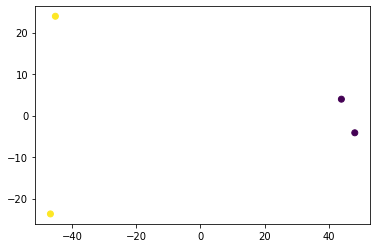

In [127]:
import matplotlib.pyplot as plt
plt.scatter(data=p, x='x1', y='x2', c='label')

Note that this is essentially an unsupervised model. We only add the labels later on. This can be interpreted as: dots closer to each other are more similar.

Another approach is the tfidf.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)

['and', 'care', 'cat', 'document', 'have', 'is', 'my', 'of', 'one', 'please', 'second', 'take', 'taken', 'the', 'third', 'this', 'you']
(4, 17)


In [138]:
names =vectorizer.get_feature_names()

k = names.index("cat")
print(X.todense()[:,k])

k = names.index("document")
print(X.todense()[:,k])

k = names.index("my")
print(X.todense()[:,k])

[[0.29236164]
 [0.        ]
 [0.        ]
 [0.34336615]]
[[0.        ]
 [0.69571213]
 [0.32555709]
 [0.        ]]
[[0.23669194]
 [0.28161946]
 [0.        ]
 [0.27798449]]


This is similar to the simple counting, it just weighs the counts.

All methods (ngrams, wordcount, tfidf) can also be used for supervised learning. Eg with a simple linear SVC:

In [140]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
clf = LinearSVC()
clf.fit(X, labels)
yhat = clf.predict(X)

print(clf.score(X, labels))
confusion_matrix(labels, yhat)

1.0


array([[2, 0],
       [0, 2]])

# Lemmatizing 
We can lemmatize the text. This could make it easier to find relevant features.

In [143]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [161]:
corpus = [
    'please please take good care of my cat.',
    'my document is the second document.',
    'and this document was the third one.',
    'were you taking better care of my cat?',
]

In [162]:
doc = nlp(" ".join(corpus))

In [163]:
doc

please please take good care of my cat. my document is the second document. and this document was the third one. were you taking better care of my cat?

In [164]:
lemma_list = []
for token in doc:
    lemma_list.append(token.lemma_)

In [165]:
set(lemma_list)

{'.',
 '?',
 'and',
 'be',
 'care',
 'cat',
 'document',
 'good',
 'my',
 'of',
 'one',
 'please',
 'second',
 'take',
 'the',
 'third',
 'this',
 'well',
 'you'}

Note how all the words "is", "was" and "were" have been reduced to "be". Also, "better" is reduced to "good".

## Stopwords
In some cases, you might want to filter out all the stopwords.

In [166]:
filtered_sentence =[] 
for word in lemma_list:
	lexeme = nlp.vocab[word]
	if lexeme.is_stop == False:
		filtered_sentence.append(word) 

In [167]:
filtered_sentence

['good',
 'care',
 'cat',
 '.',
 'document',
 'second',
 'document',
 '.',
 'document',
 '.',
 'care',
 'cat',
 '?']